In [1]:
import numpy as np # linear algebra
import pandas as pd #
import cv2
import os
import matplotlib
import tensorflow as tf
import tensorflow.keras.layers as tfl
from matplotlib import pyplot as plt

In [2]:
!unzip dataset.zip

unzip:  cannot find or open dataset.zip, dataset.zip.zip or dataset.zip.ZIP.


In [ ]:
path_to_train_data = "dataset/train/train"
train_dirs = []
for entry in os.scandir(path_to_train_data):
    if entry.is_dir():
        train_dirs.append(entry.path)

In [ ]:
X = []
y = []
d = range(20)
for train_dir in train_dirs:
    train = train_dir.split('/')[-1]
    for training_image in os.scandir(train_dir):
        img1 = cv2.imread(training_image.path)
        X.append(img1)
        y.append(d[int(train)])

y = np.array(y)

X = np.array(X).astype(float)

In [ ]:
print(X.shape)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

(9900, 50, 50, 3)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, ZeroPadding2D, Conv2D, MaxPooling2D, ReLU, Dropout
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (7,7),strides = (1,1),input_shape = (50,50,3)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=None, padding='valid'))
model.add(ReLU())
model.add(Dropout(0.3))
model.add(Conv2D(filters = 16,kernel_size = (3,3),strides = (1,1)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=None, padding='valid'))
model.add(ReLU())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(20,activation='softmax'))
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-6),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:

history = model.fit(X_train,y_train, epochs=100, validation_data = (X_test,y_test))

history.history

Epoch 1/100
233/233 [==============================] - 28s 113ms/step - loss: 138.3805 - accuracy: 0.0197 - val_loss: 54.4464 - val_accuracy: 0.0000e+00
Epoch 2/100
233/233 [==============================] - 25s 107ms/step - loss: 88.6822 - accuracy: 0.0249 - val_loss: 34.6819 - val_accuracy: 0.0024
Epoch 3/100
233/233 [==============================] - 24s 103ms/step - loss: 57.6290 - accuracy: 0.0409 - val_loss: 25.8270 - val_accuracy: 0.0554
Epoch 4/100
233/233 [==============================] - 25s 106ms/step - loss: 42.4411 - accuracy: 0.0578 - val_loss: 21.2295 - val_accuracy: 0.1426
Epoch 5/100
233/233 [==============================] - 25s 107ms/step - loss: 34.4354 - accuracy: 0.0757 - val_loss: 17.8823 - val_accuracy: 0.1766
Epoch 6/100
233/233 [==============================] - 25s 107ms/step - loss: 28.8367 - accuracy: 0.0974 - val_loss: 15.2249 - val_accuracy: 0.1907
Epoch 7/100
233/233 [==============================] - 25s 107ms/step - loss: 24.7561 - accuracy: 0.1172 - 

{'loss': [138.38052368164062,
  88.68221282958984,
  57.628963470458984,
  42.44110870361328,
  34.43536376953125,
  28.836713790893555,
  24.75606918334961,
  21.568405151367188,
  18.90435028076172,
  17.06399917602539,
  15.09537410736084,
  13.82904052734375,
  12.310667037963867,
  11.22030258178711,
  10.343216896057129,
  9.341849327087402,
  8.48445987701416,
  7.780860900878906,
  7.186168670654297,
  6.557025909423828,
  6.060211181640625,
  5.543390274047852,
  5.162898063659668,
  4.698290824890137,
  4.270370960235596,
  3.8831841945648193,
  3.653937816619873,
  3.443950653076172,
  3.153528928756714,
  2.8667495250701904,
  2.688972234725952,
  2.5060150623321533,
  2.371091604232788,
  2.174309253692627,
  2.033135175704956,
  1.8725625276565552,
  1.679335594177246,
  1.594504714012146,
  1.4441423416137695,
  1.3379733562469482,
  1.265897274017334,
  1.0748132467269897,
  1.0415490865707397,
  0.9565150141716003,
  0.8305020928382874,
  0.7460703253746033,
  0.669092

<ipython-input-9-b296b54b08f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
<ipython-input-9-b296b54b08f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

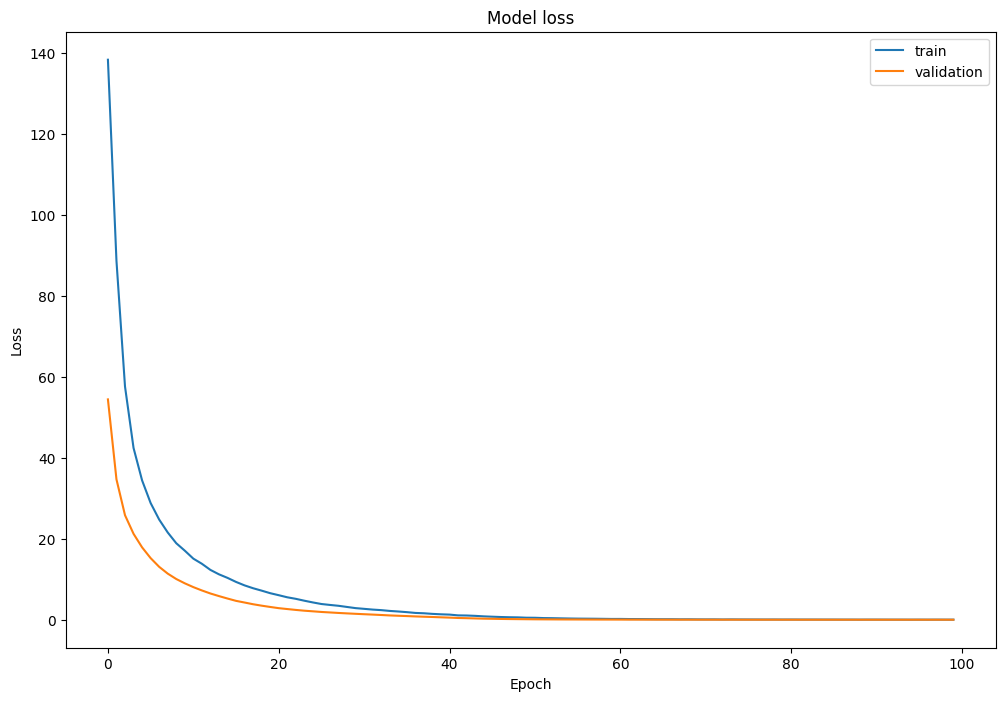

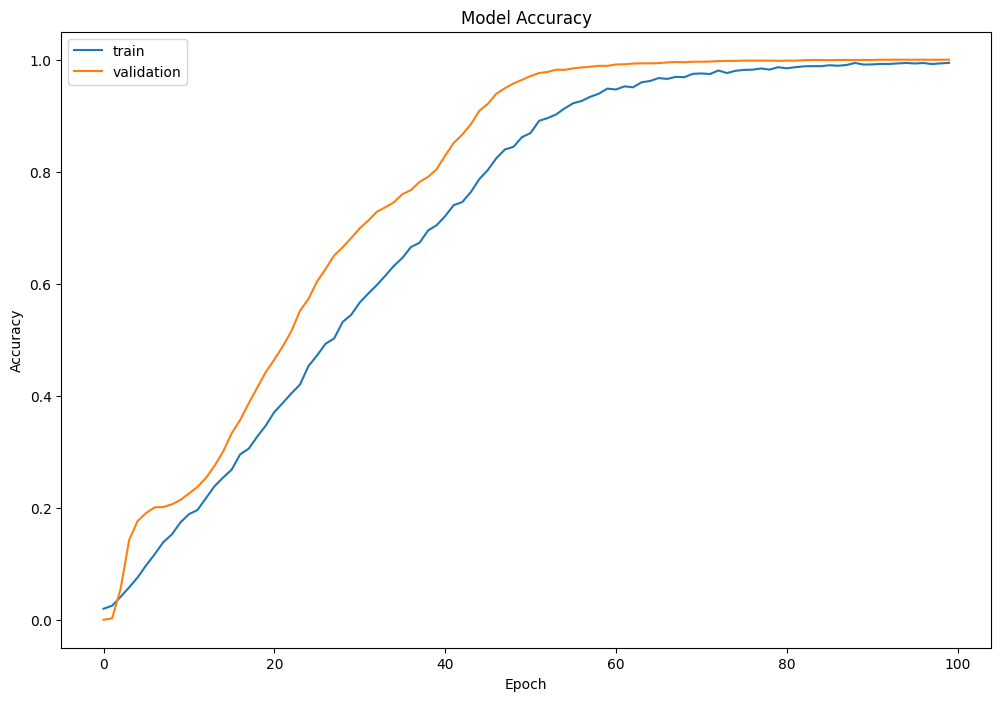

In [ ]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [ ]:

path_to_test_data = "dataset/test/test"
test_dirs = []
for entry in os.scandir(path_to_test_data):
    if entry.is_dir():
        test_dirs.append(entry.path)

In [ ]:
X_test1 = []
test_target = []
d1 = range(20)
for test_dir in test_dirs:
    test = test_dir.split('/')[-1]
    for test_image in os.scandir(test_dir):
        img2 = cv2.imread(test_image.path)
        X_test1.append(img2)
        test_target.append(d1[int(test)])

In [ ]:
X_test1 = np.array(X_test1).astype(float)

y_pred = model.predict(X_test1)
for x in range(len(X_test1)):
    print('Actual value-->',test_target[x],'   Predicted value-->',np.argmax(y_pred[x]))

94/94 [==============================] - 3s 32ms/step
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    Predicted value--> 1
Actual value--> 1    P